In [5]:
import tensorflow as tf

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
 train_datagen=ImageDataGenerator(
     rescale=1./255,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True)

In [8]:
train_generator=train_datagen.flow_from_directory(
    'drive/MyDrive/dataset/training_set/training_set',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary')

Found 8015 images belonging to 2 classes.


In [9]:
test_datagen=ImageDataGenerator( rescale=1./255)
validation_generator=test_datagen.flow_from_directory(
    'drive/MyDrive/dataset/test_set/test_set',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

Found 2023 images belonging to 2 classes.


In [10]:
cnn = tf.keras.models.Sequential()

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

In [12]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

In [14]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Flatten())

In [16]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [17]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [18]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=cnn.fit(x=train_generator,validation_data=validation_generator,epochs=20)

Epoch 1/20
251/251 [==============================] - 2843s 11s/step - loss: 0.6784 - accuracy: 0.5754 - val_loss: 0.6489 - val_accuracy: 0.6268
Epoch 2/20
251/251 [==============================] - 79s 313ms/step - loss: 0.6260 - accuracy: 0.6530 - val_loss: 0.5809 - val_accuracy: 0.7088
Epoch 3/20
251/251 [==============================] - 79s 313ms/step - loss: 0.5703 - accuracy: 0.7001 - val_loss: 0.5802 - val_accuracy: 0.7074
Epoch 4/20
251/251 [==============================] - 79s 313ms/step - loss: 0.5313 - accuracy: 0.7296 - val_loss: 0.5208 - val_accuracy: 0.7553
Epoch 5/20
251/251 [==============================] - 79s 313ms/step - loss: 0.5068 - accuracy: 0.7520 - val_loss: 0.4885 - val_accuracy: 0.7642
Epoch 6/20
251/251 [==============================] - 78s 313ms/step - loss: 0.4833 - accuracy: 0.7672 - val_loss: 0.4838 - val_accuracy: 0.7662
Epoch 7/20
251/251 [==============================] - 79s 315ms/step - loss: 0.4681 - accuracy: 0.7797 - val_loss: 0.4789 - val_ac

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img("drive/MyDrive/dataset/single_pred/cat.jpg",target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
  prediction='Dog'
else:
  prediction='Cat'


In [ ]:
prediction

'Cat'

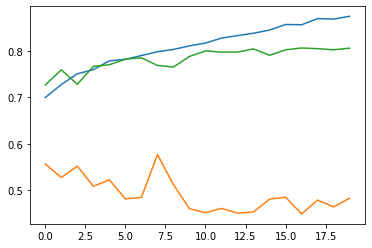

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])